# 4주차

### KNN&NaiveBayes&Clustering 
[Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)




## 1. [Fraud Detection in Transaction Data using KNN](https://www.kaggle.com/maneesha96/fraud-detection-in-transaction-data-using-knn)

### 1. 라이브러리 및 데이터 불러오기

In [55]:
# main libraries
import pandas as pd
import numpy as np
import time

# visual libraries
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
#from sklearn.externals import joblib 
# 해당 패키지 설치 실패... 저장과정에서만 사용되므로 괜찮을듯 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('C:/Jiwon/data/creditcard.csv');
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

> 데이터 행렬확인

### 2. 결측치 확인

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

> 결측치 없음

In [6]:
All = df.shape[0]
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

x = len(fraud)/All
y = len(nonFraud)/All

print('이상거래 :',x*100,'%')
print('정상거래 :',y*100,'%')

이상거래 : 0.1727485630620034 %
정상거래 : 99.82725143693798 %


> 불균형 데이터'

Text(0, 0.5, 'Frequency')

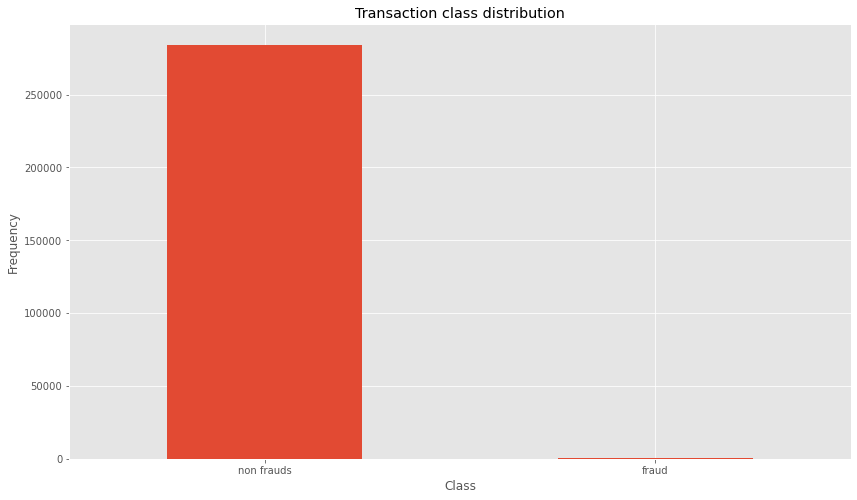

In [56]:
labels = ['non frauds','fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

> 불균형 데이터 시각화

### 3. 범주형 데이터 확인

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

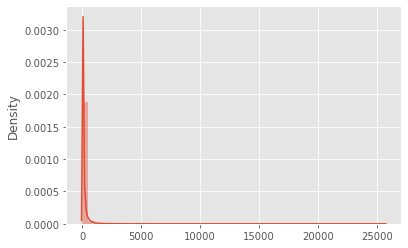

In [9]:
amount = [df['Amount'].values]
sns.distplot(amount)

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

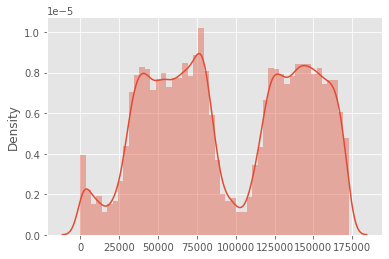

In [10]:
time = df['Time'].values
sns.distplot(time)

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

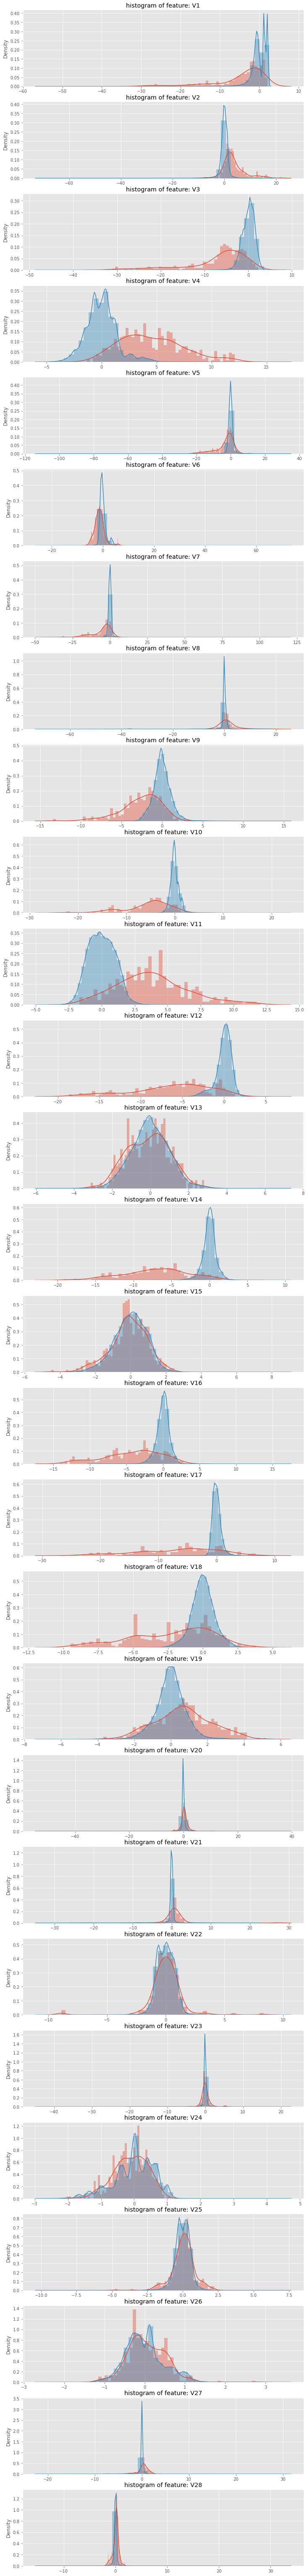

In [11]:
anomalous_features = df.iloc[:,1:29].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[anomalous_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

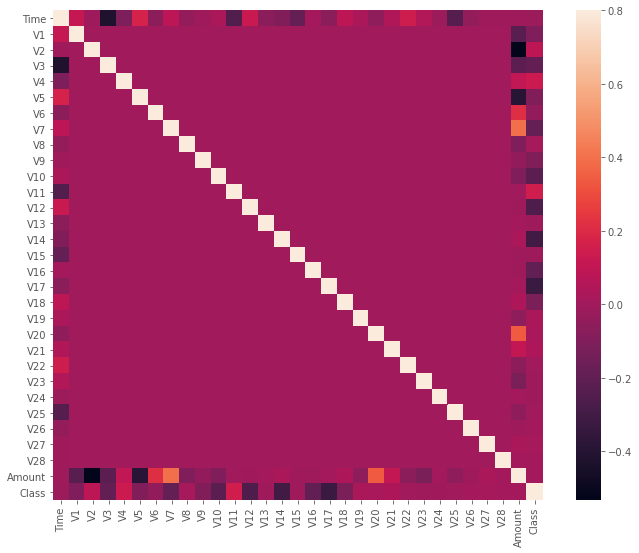

In [12]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

> PCA 처리된 데이터이므로 상관관계 나타나지 않음

### 5. 데이터 표준화

> V변수들은 PCA 변환 결과인 수치형변수이다. PCA는 규모에 따라 영향을 받기 때문에 시간과 금액변수를 PCA 처리 하기 전에 데이터의 기능 확장해야 한다. 
StandardScaler()를 사용하여 스케일링할것이다.

In [13]:
df['Vamount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['Vtime'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis = 1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


> 따라서 모든 변수들이 표준화됨

### 5. PCA 변환

In [14]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [15]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,Class
0,1.571796,-0.675441,0
1,-1.086234,-0.282721,0
2,2.053399,1.077491,0
3,1.150038,-0.427530,0
4,1.143613,-1.342213,0


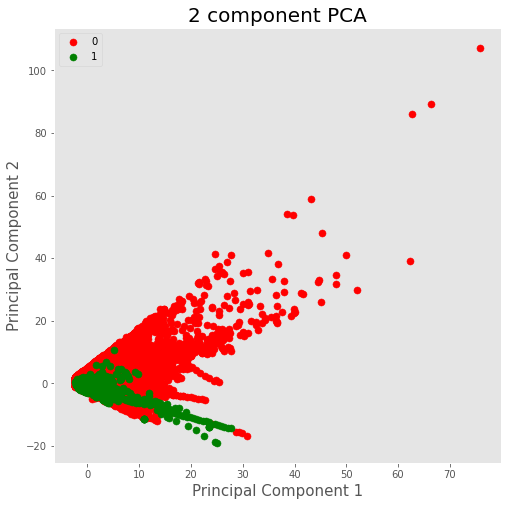

In [16]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

> 데이터가 불균형하기 때문에 이상거래 데이터수인 492만큼 정상거래에서 샘플링한다. 

In [17]:
df = df.sample(frac=1)

frauds = df[df['Class'] == 1]
non_frauds = df[df['Class'] == 0][:492]

new_df = pd.concat([non_frauds, frauds])
# Shuffle dataframe rows
new_df = new_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Vamount,Vtime
9487,-4.153014,8.204797,-15.031714,10.330100,-3.994426,-3.250013,-10.415698,4.620804,-5.711248,-11.797181,...,0.256510,0.485908,-1.198821,-0.526567,0.634874,1.627209,0.723235,1,-0.349231,-1.700235
113515,-3.869173,-2.875948,0.980697,0.346851,2.730354,-1.390639,-1.016797,0.162958,-0.111301,0.074089,...,-0.455837,-1.353589,-0.138711,-0.969066,-0.165561,-0.027115,-1.060262,0,-0.349671,-0.457333
167184,-5.961457,5.313382,-6.674320,6.028975,-1.387560,0.670638,-4.128987,-4.765894,-1.005259,0.453505,...,-1.501808,1.355172,0.141093,0.077913,0.473988,0.287129,1.468653,1,0.070128,0.499455
132026,-0.684261,0.570399,-0.011682,-1.531207,2.969374,3.047809,0.149385,0.906856,-0.638138,-0.906574,...,-1.008941,-0.084839,0.933026,0.012760,-0.041175,0.035781,0.112560,0,-0.348072,-0.315613
44051,-2.718599,-0.391039,1.496103,1.297957,-0.660211,0.124834,-0.635441,1.107635,-0.544281,-0.767929,...,0.307336,0.429809,0.026925,0.421663,-0.251102,0.032045,-0.602129,0,-0.202981,-1.117099


Text(0, 0.5, 'Frequency')

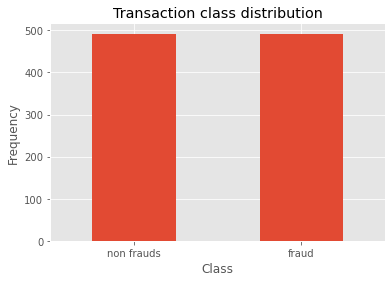

In [18]:
labels = ['non frauds','fraud']
classes = pd.value_counts(new_df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [19]:
features = new_df.drop(['Class'], axis = 1)
labels = pd.DataFrame(new_df['Class'])

feature_array = features.values
label_array = labels.values

### 6. 데이터 split

In [20]:

X_train,X_test,y_train,y_test = train_test_split(feature_array,label_array,test_size=0.20)


X_train = normalize(X_train)
X_test=normalize(X_test)

In [21]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(X_train,y_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test.ravel()) 

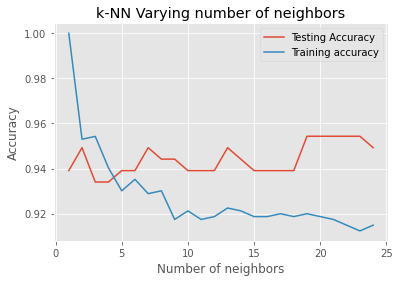

In [22]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [23]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [24]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(X_train,y_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=19)

In [26]:
knn_predicted_test_labels=knn.predict(X_test)

Text(0.5, 1.0, ' Number of Blobs')

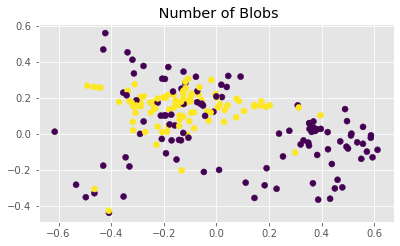

In [27]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(X_test[:, 0], X_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [28]:
knn_accuracy_score  = accuracy_score(y_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(y_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(y_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(y_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(y_test,knn_predicted_test_labels)

In [29]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(y_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.9543147208121827
Precison --> 0.9555555555555556
Recall --> 0.945054945054945
F1 --> 0.9502762430939227
MCC --> 0.908072526973923
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



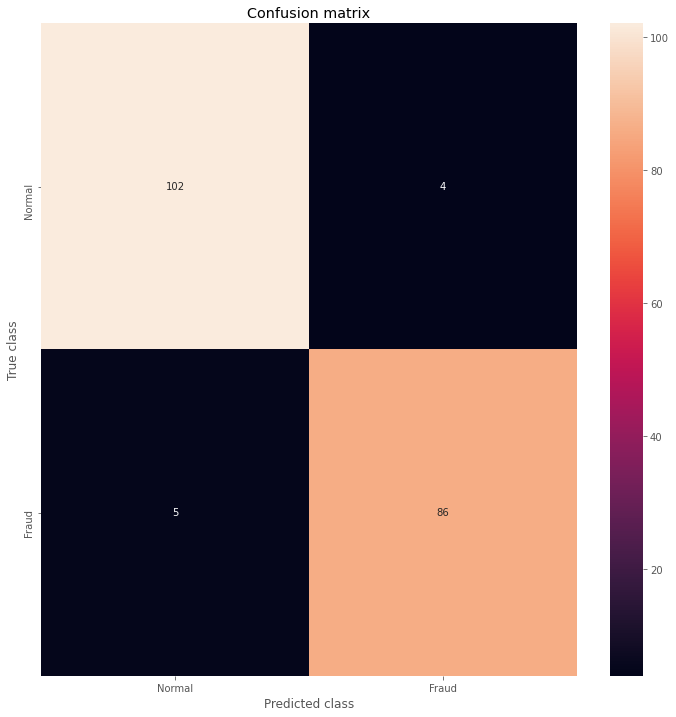

In [30]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, knn_predicted_test_labels)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

## 2. [Fraud Detection with Naive Bayes Classifier](https://www.kaggle.com/lovedeepsaini/fraud-detection-with-naive-bayes-classifier)

### 1. 라이브러리 및 데이터 불러오기

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV
df = pd.read_csv('C:/Jiwon/data/creditcard.csv');

# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())


(284807, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

Class as pie chart:


Text(0, 0.5, '')

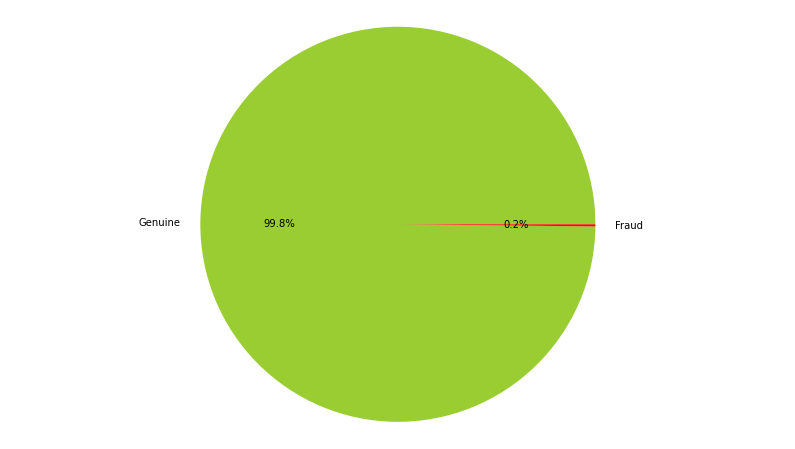

In [33]:
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

> 불균형 확인

### 2. 변수 형태 확인

Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

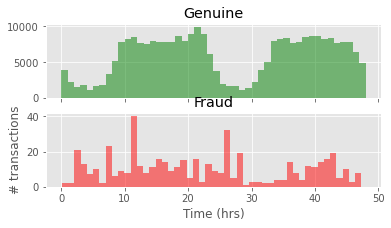

In [34]:
#plot Time to see if there is any trend
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

> 낮에 거래수가 증가하지만 이상치도 비슷하므로 클래스를 구분하는데 도움이 안된다고 생각됨. <br>
Time변수는 삭제하지만 Time_HR변수는 유지해볼것.

In [35]:
df = df.drop(['Time'],axis=1)

Text(0, 0.5, '# transactions')

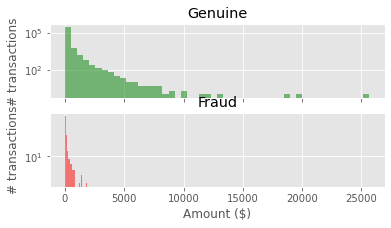

In [36]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

> Amount변수는 표준화 후 나중에 사용

In [37]:
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jiwon\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

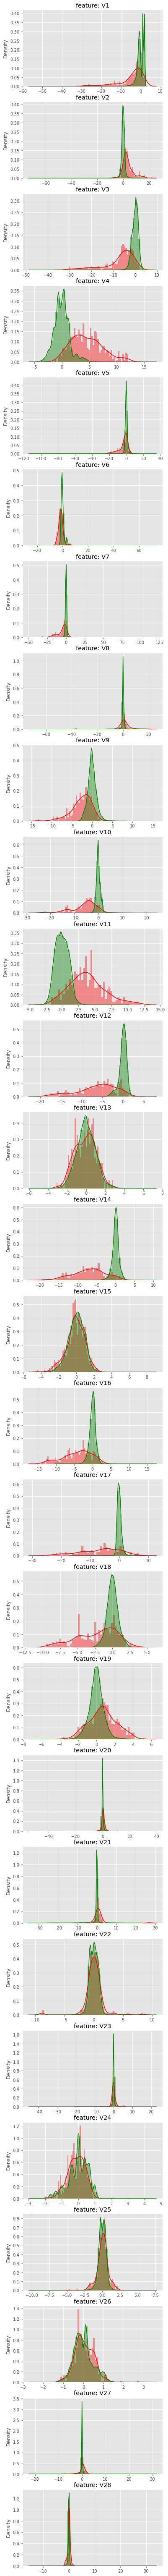

In [38]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

> 특정 변수들은 두 클래스의 분포가 유사하여 예외처리해도 무방함

### 4. 데이터 분리

In [39]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [40]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    print('train-set confusion matrix:\n', confusion_matrix(y_train,train_pred)) 
    return y_pred, y_pred_prob

* 분류 스코어 확인하는 함수

In [41]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

* 전체 변수 이용한 경우

In [43]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[222480   4971]
 [    69    325]]
test-set confusion matrix:
 [[55535  1329]
 [   15    83]]
recall score:  0.8469387755102041
precision score:  0.058781869688385266
f1 score:  0.10993377483443707
accuracy score:  0.9764053228468101
ROC AUC: 0.963247971529636


* 특정한 변수 제외한 경우

In [44]:
# Case-NB-2 : drop some of principle components that have similar distributions in above plots 
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'Time_Hr',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223967   3484]
 [    61    333]]
test-set confusion matrix:
 [[55935   929]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08472906403940887
f1 score:  0.15453728661275834
accuracy score:  0.9834802148800955
ROC AUC: 0.9622034097825962


> 분포가 비슷한 변수를 제거함으로써 모델의 정확도 향상시킬수 있다. 

* 특정 V변수 + Time 제외한 경우

In [45]:
# Case-NB-3 : drop some of principle components + Time 
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[223964   3487]
 [    60    334]]
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613612643988377


> Time_Hr변수가 모델의 분류에 영향을 미치지 않음. 제거하는것이 좋음

* 특정 V변수 + Time+ 스케일된 Amount변수 제외한 경우

In [46]:
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98
train-set confusion matrix:
 [[224025   3426]
 [    60    334]]
test-set confusion matrix:
 [[55954   910]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08634538152610442
f1 score:  0.15722120658135283
accuracy score:  0.9838137705838981
ROC AUC: 0.9611556179872063


> 마지막 모델이 더 좋은 결과를 가져다 주기 때문에 해당 모델에서 사용되지 않은 변수들 제외할것.

In [47]:
df = df.drop(drop_list,axis=1)
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')


* 이아래는 로지스틱 회귀인데 돌려봄

In [49]:
# let us check recall score for logistic regression
# Case-LR-1
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01)
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

train-set confusion matrix:
 [[227427     24]
 [   153    241]]
test-set confusion matrix:
 [[56851    13]
 [   39    59]]
recall score:  0.6020408163265306
precision score:  0.8194444444444444
f1 score:  0.6941176470588234
accuracy score:  0.9990871107053826
ROC AUC: 0.9725212608960297


In [50]:
# get indices for fraud and genuine classes 
fraud_ind = np.array(df[df.Class == 1].index)
gen_ind = df[df.Class == 0].index
n_fraud = len(df[df.Class == 1])
# random selection from genuine class
random_gen_ind = np.random.choice(gen_ind, n_fraud, replace = False)
random_gen_ind = np.array(random_gen_ind)
# merge two class indices: random genuine + original fraud
under_sample_ind = np.concatenate([fraud_ind,random_gen_ind])
# Under sample dataset
undersample_df = df.iloc[under_sample_ind,:]
y_undersample  = undersample_df['Class'].values #target
X_undersample = undersample_df.drop(['Class'],axis=1).values #features

print("# transactions in undersampled data: ", len(undersample_df))
print("% genuine transactions: ",len(undersample_df[undersample_df.Class == 0])/len(undersample_df))
print("% fraud transactions: ", sum(y_undersample)/len(undersample_df))

# transactions in undersampled data:  984
% genuine transactions:  0.5
% fraud transactions:  0.5


In [51]:
# let us train logistic regression with undersamples data
# Case-LR-2
# split undersampled data into 80/20 train-test datasets. 
# - Train model from this 80% fraction of undersampled data, get predictions from left over i.e. 20%.
drop_list = []
X_und_train, X_und_test, y_und_train, y_und_test = split_data(undersample_df, drop_list)
y_und_pred, y_und_pred_prob = get_predictions(LogisticRegression(C = 0.01), X_und_train, y_und_train, X_und_test)
print_scores(y_und_test,y_und_pred,y_und_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class'],
      dtype='object')
train-set size:  787 
test-set size:  197
fraud cases in test-set:  98
train-set confusion matrix:
 [[389   4]
 [ 50 344]]
test-set confusion matrix:
 [[97  2]
 [ 6 92]]
recall score:  0.9387755102040817
precision score:  0.9787234042553191
f1 score:  0.9583333333333333
accuracy score:  0.9593908629441624
ROC AUC: 0.9868068439497011


In [53]:
# Case-LR-3
# "train" with undersamples, "test" with full data
# call classifier
lr = LogisticRegression(C = 0.01)
# fit it to complete undersampled data
lr.fit(X_undersample, y_undersample)
# predict on full data
y_full = df['Class'].values #target
X_full = df.drop(['Class'],axis=1).values #features
y_full_pred = lr.predict(X_full)
# Compute predicted probabilities: y_pred_prob
y_full_pred_prob = lr.predict_proba(X_full)
print("scores for Full set")   
print('test-set confusion matrix:\n', confusion_matrix(y_full,y_full_pred)) 
print("recall score: ", recall_score(y_full,y_full_pred))
print("precision score: ", precision_score(y_full,y_full_pred))

scores for Full set
test-set confusion matrix:
 [[280487   3828]
 [    57    435]]
recall score:  0.8841463414634146
precision score:  0.10204081632653061


In [54]:
# Case-LR-4
y_p20_pred = lr.predict(X_test)
y_p20_pred_prob = lr.predict_proba(X_test)
print("scores for test (20% of full) set")   
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_p20_pred)) 
print("recall score: ", recall_score(y_test,y_p20_pred))
print("precision score: ", precision_score(y_test,y_p20_pred))

scores for test (20% of full) set
test-set confusion matrix:
 [[56046   818]
 [    9    89]]
recall score:  0.9081632653061225
precision score:  0.09812568908489526


## 3. [Naive Bayes Classifier in Python](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)